In [11]:
data = pd.read_csv("Data set/k_mean_data.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


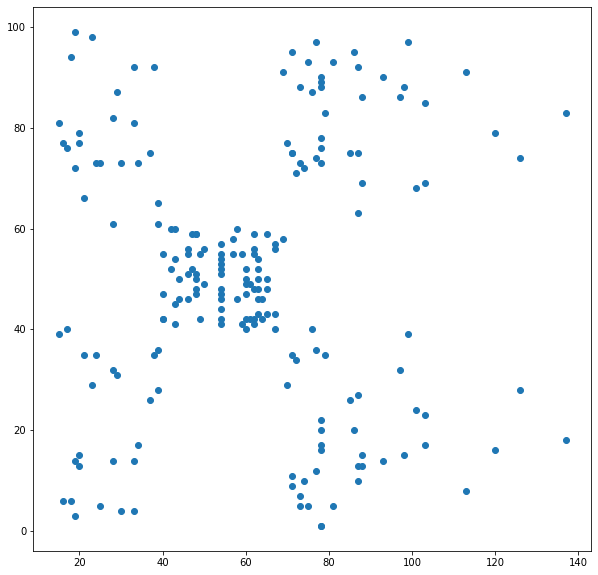

In [12]:
df = pd.DataFrame(data)
df.columns = ["CustomerID", "Gender", "Age", "Annual_Income", "Spending_Score"]
df['GroupID'] = [0] * len(df)

plt.figure(figsize=(10,10))
plt.scatter(data.Annual_Income, data.Spending_Score)

In [13]:
def dist(x1, y1, x2, y2):
    return (x1-x2)**2 + (y1-y2)**2

In [14]:
k = 5
centroid = []

# randomly set the centroid
for _ in range(k):
    x = np.random.randint(min(df.Annual_Income), max(df.Annual_Income))
    y = np.random.randint(min(df.Spending_Score), max(df.Spending_Score))
    centroid.append((x,y))
    
print(centroid)

[(43, 37), (79, 18), (116, 85), (71, 4), (122, 22)]


In [21]:
# find which cluster the point belongs to

def find_cluster(x, y):
    cluster_idx= 0
    d = dist(x, y, centroid[0][0], centroid[0][1])
    
    for i in range(k):
        cur_dist = dist(x, y, centroid[i][0], centroid[i][1])
        if cur_dist < d:
            d = cur_dist
            cluster_idx = i
            
    return cluster_idx

In [27]:
# assign groupId to all points
for index, row in df.iterrows():
    df.loc[index, 'GroupID'] = find_cluster(row.Annual_Income, row.Spending_Score)
    
df.GroupID

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    4
197    2
198    4
199    2
Name: GroupID, Length: 200, dtype: int64

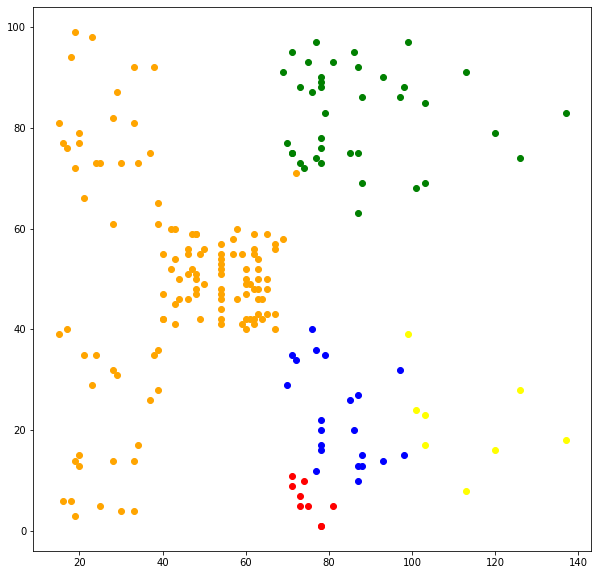

In [26]:
# drawing scatter plot after assign group

group_color = ['orange', 'blue', 'green', 'red', 'yellow']

plt.figure(figsize = (10,  10))
for index, row in df.iterrows():
    plt.scatter(row.Annual_Income, row.Spending_Score, color = group_color[row.GroupID])

In [29]:
def centroid_movement():
    temp = []
    
    for _ in range(k):
        temp.append([0,0])
        
    for index, row in df.iterrows():
        temp[row.GroupID][0] += row.Annual_Income
        temp[row.GroupID][1] += row.Spending_Score
            
    for i in range(k):
        cnt = len(df.loc[df['GroupID'] == i])
        temp[i][0] /= cnt
        temp[i][1] /= cnt
            
        centroid[i] = temp[i]

centroid_movement()
print(centroid)

[[44.37903225806452, 50.0], [82.38095238095238, 22.904761904761905], [86.92105263157895, 82.42105263157895], [74.88888888888889, 6.0], [112.75, 21.625]]


In [33]:
# assign all numbers to each group

def centroid_assignment():
    updated = False
    for index, row in df.iterrows():
        past = df.loc[index, 'GroupID']
        cur = find_cluster(row.Annual_Income, row.Spending_Score)
        df.loc[index, 'GroupID'] = cur
        
        if past != cur:
            updated = True
            
    return updated

In [39]:
def optimization():
    while True:
        if centroid_assignment() is False:
            break

        centroid_movement()

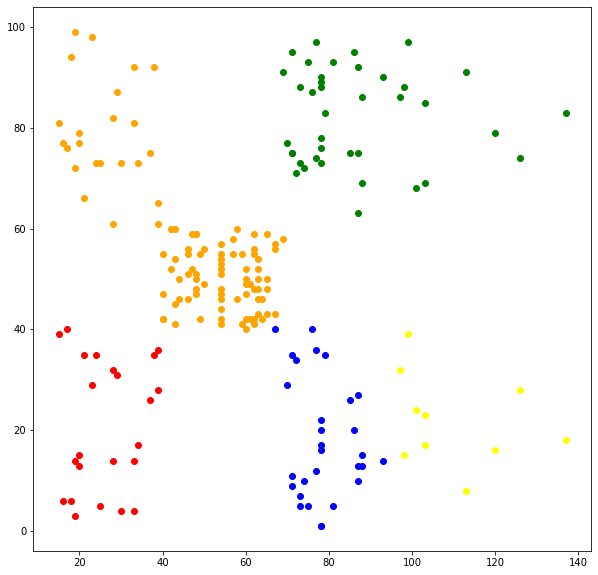

In [40]:
optimization()

group_color = ['orange', 'blue', 'green', 'red', 'yellow']

plt.figure(figsize = (10,  10))
for index, row in df.iterrows():
  plt.scatter(row.Annual_Income, row.Spending_Score, color = group_color[row.GroupID])